

## **Breast Cancer Prediction Project**

This project aims to develop a predictive model for breast cancer diagnosis using a dataset of tumor characteristics. The dataset contains features computed from digitized images of breast tissue, representing various physical properties of cell nuclei. The primary objective is to classify tumors as either malignant or benign based on these features.

###**Dataset Overview:**

**Target Variable:** diagnosis - Indicates whether the tumor is **malignant (M)** or **benign (B)**.
**Feature Variables:** Measurements such as radius_mean, texture_mean, area_mean, among others, that describe the characteristics of the tumor.
Total Features: 30 (excluding the target variable and any irrelevant columns).

Project Goals:



*   Perform data preprocessing to clean and prepare the dataset for modeling.
*   Conduct exploratory data analysis (EDA) to understand the distribution of features and their relationship with the target variable.
*   Train and evaluate multiple machine learning models to identify the most accurate and reliable method for predicting breast cancer.
*   Interpret the results to gain insights into the most influential features contributing to the prediction.








In [ ]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np

#Data Visualization Libraries
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.pipeline import make_pipeline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


#Data processing, Modeling and Evaluation Libraries
import scipy.stats.mstats as mstats
from scipy.stats import uniform
from scipy import stats
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

#***Loading dataset***

In [ ]:
#loading data
data = pd.read_csv("https://raw.githubusercontent.com/EssieDS/IIPDatasets/main/breastcancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#***Explorative Data Analysis (EDA)***

Step 1: Data Understanding

In [ ]:
data.shape

(569, 33)

In [ ]:
data.size

18777

In [ ]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
512,915691,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.013340,0.01705,0.004005,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,NaN
443,909777,B,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,0.1818,2.5420,1.277,13.12,0.010720,0.01331,0.01993,0.011110,0.01717,0.004492,10.940,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736,NaN
494,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.500,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429,NaN
211,8810528,B,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,0.2222,0.8652,1.444,17.12,0.005517,0.01727,0.02045,0.006747,0.01616,0.002922,13.300,24.99,85.22,546.3,0.12800,0.18800,0.14710,0.06913,0.2535,0.07993,NaN
116,864726,B,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.018350,0.06760,0.09263,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.shape

(569, 31)

In [ ]:
# prompt: drop all variables after variable 10
data = data.iloc[:, :11]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,1.483967,-2.201938,1.627074,0.013746,1.725634,-0.175292,-0.274712,-0.354424,2.670869,-0.101638
1,1,2.372621,-0.330420,2.119311,0.013746,-0.859711,-0.448019,0.200974,0.824090,0.091045,-0.950379
2,1,2.069515,0.550890,1.977975,0.013746,1.049727,1.487509,2.079575,2.644197,1.183326,-0.345047
3,1,-0.779002,0.330562,-0.576781,-0.866526,-0.010987,-0.175292,-0.274712,1.928513,-0.032208,-0.101638
4,1,2.276178,-1.199068,2.226531,0.013746,0.335416,0.842015,2.089775,1.900138,0.078295,-0.556549


In [ ]:
#Checking for duplicates
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean]
Index: []


#**Step 3: Feature Understanding**

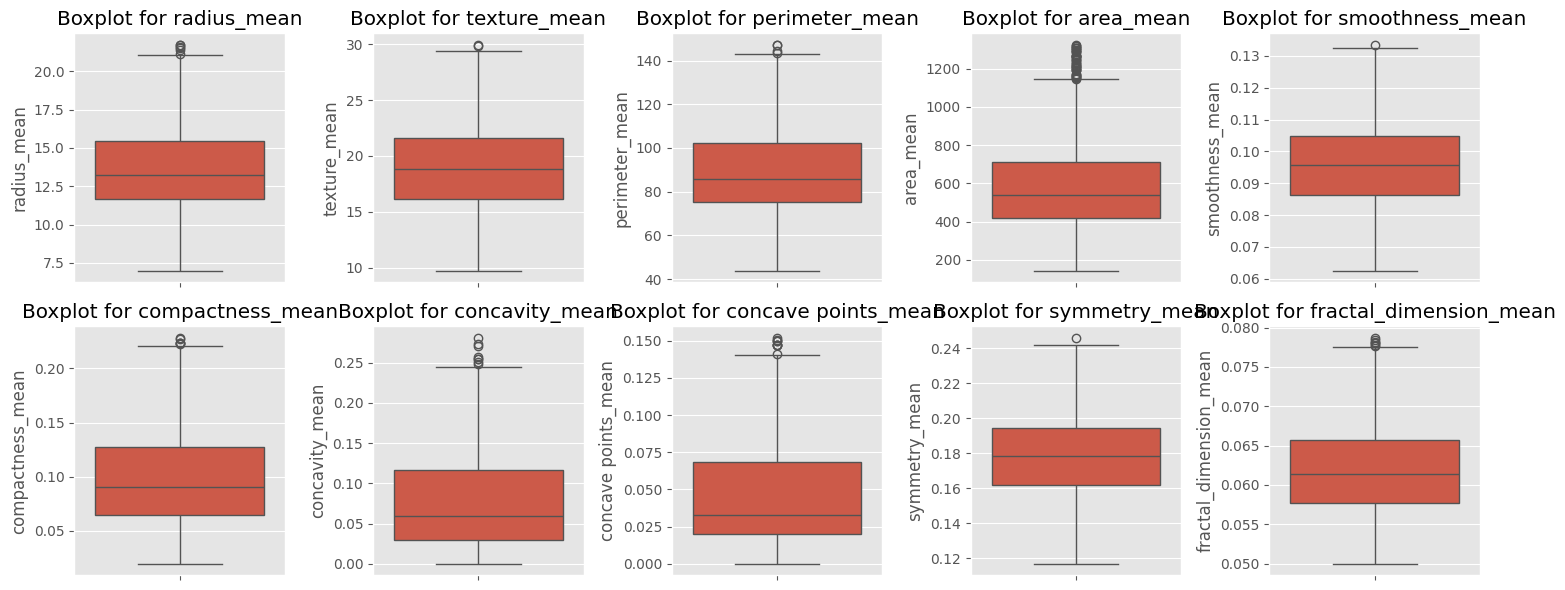

In [ ]:
# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
'''
# Get outlier rows
outlier_rows = df1[outliers]
print("\nOutlier Rows:")
print(outlier_rows)
'''

# Visualizing outliers (for numerical features)
def plot_outliers_grid(data, columns, nrows=3, ncols=3):
    num_cols = len(columns)
    num_rows = (num_cols // ncols) + (num_cols % ncols > 0)

    plt.figure(figsize=(ncols * 3, num_rows * 3))

    for i, col in enumerate(columns):
        plt.subplot(num_rows, ncols, i + 1)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot for {col}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()
#Numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=[np.number]).columns
plot_outliers_grid(data, numerical_columns, nrows=5, ncols=5)

In [ ]:
def replace_outliers_with_nan_iqr(data, columns):
    for col in columns:
        # Calculating Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        # Defining our outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with NaN
        data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = np.nan
    return data
# Specify numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Replace outliers with NaN
data = replace_outliers_with_nan_iqr(data, numerical_columns)

# Impute missing values with median
for col in numerical_columns:
    median = data[col].median()
    data[col].fillna(median, inplace=True)

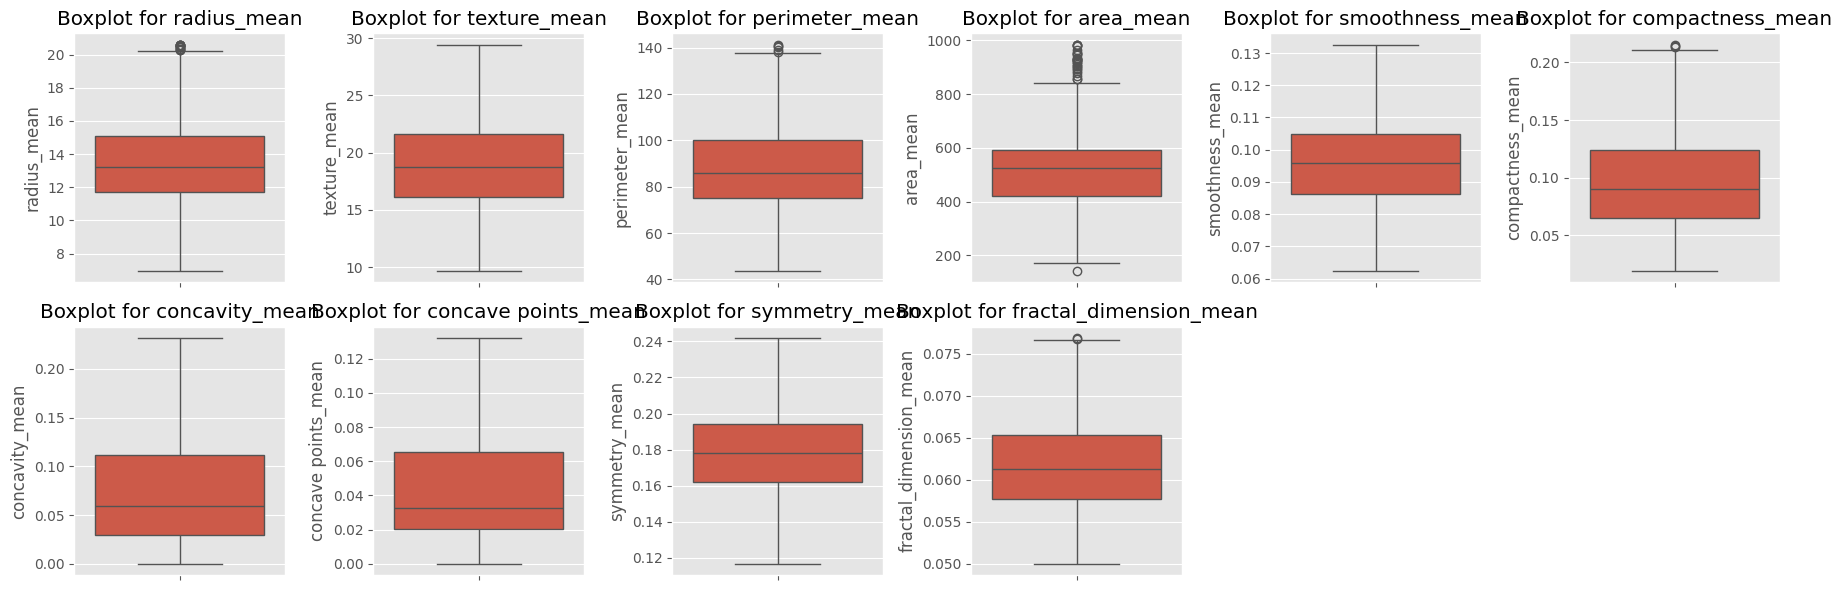

In [ ]:
# Plot vertical boxplots in a grid format
def plot_outliers_grid(data, columns, nrows=3, ncols=3):
    num_cols = len(columns)
    num_rows = (num_cols // ncols) + (num_cols % ncols > 0)

    plt.figure(figsize=(ncols * 3, num_rows * 3))

    for i, col in enumerate(columns):
        plt.subplot(num_rows, ncols, i + 1)
        sns.boxplot(y=data[col])  # Use y-axis for vertical boxplots
        plt.title(f'Boxplot for {col}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

# Specify columns for which to plot
numerical_columns = data.select_dtypes(include=[np.number]).columns
plot_outliers_grid(data, numerical_columns, nrows=5, ncols=5)

<ipython-input-33-2be55237c6e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=data, palette='Set2')


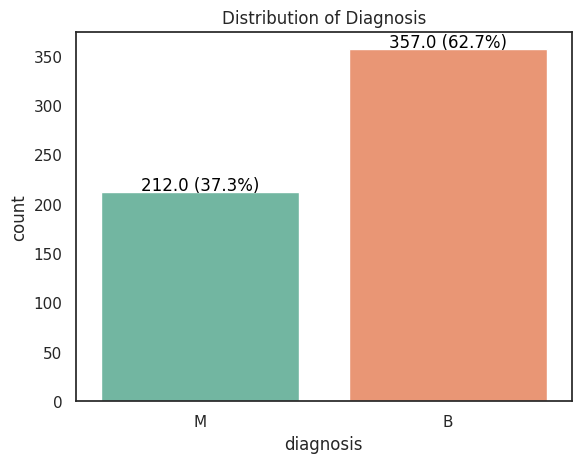

In [ ]:
# Set the style of the plot
sns.set(style="white")  # Remove grid lines by setting the style to "white"

# Create the count plot with a custom color palette
ax = sns.countplot(x='diagnosis', data=data, palette='Set2')

# Set the title of the plot
plt.title('Distribution of Diagnosis')

# Calculate the total number of samples
total = len(data)

# Add count and percentage labels on top of the bars
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count} ({percentage})',  # Place percentage beside the count
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


###**Data preprocessing**

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [ ]:
#feature normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data.iloc[:,1:] = sc.fit_transform(data.iloc[:,1:])

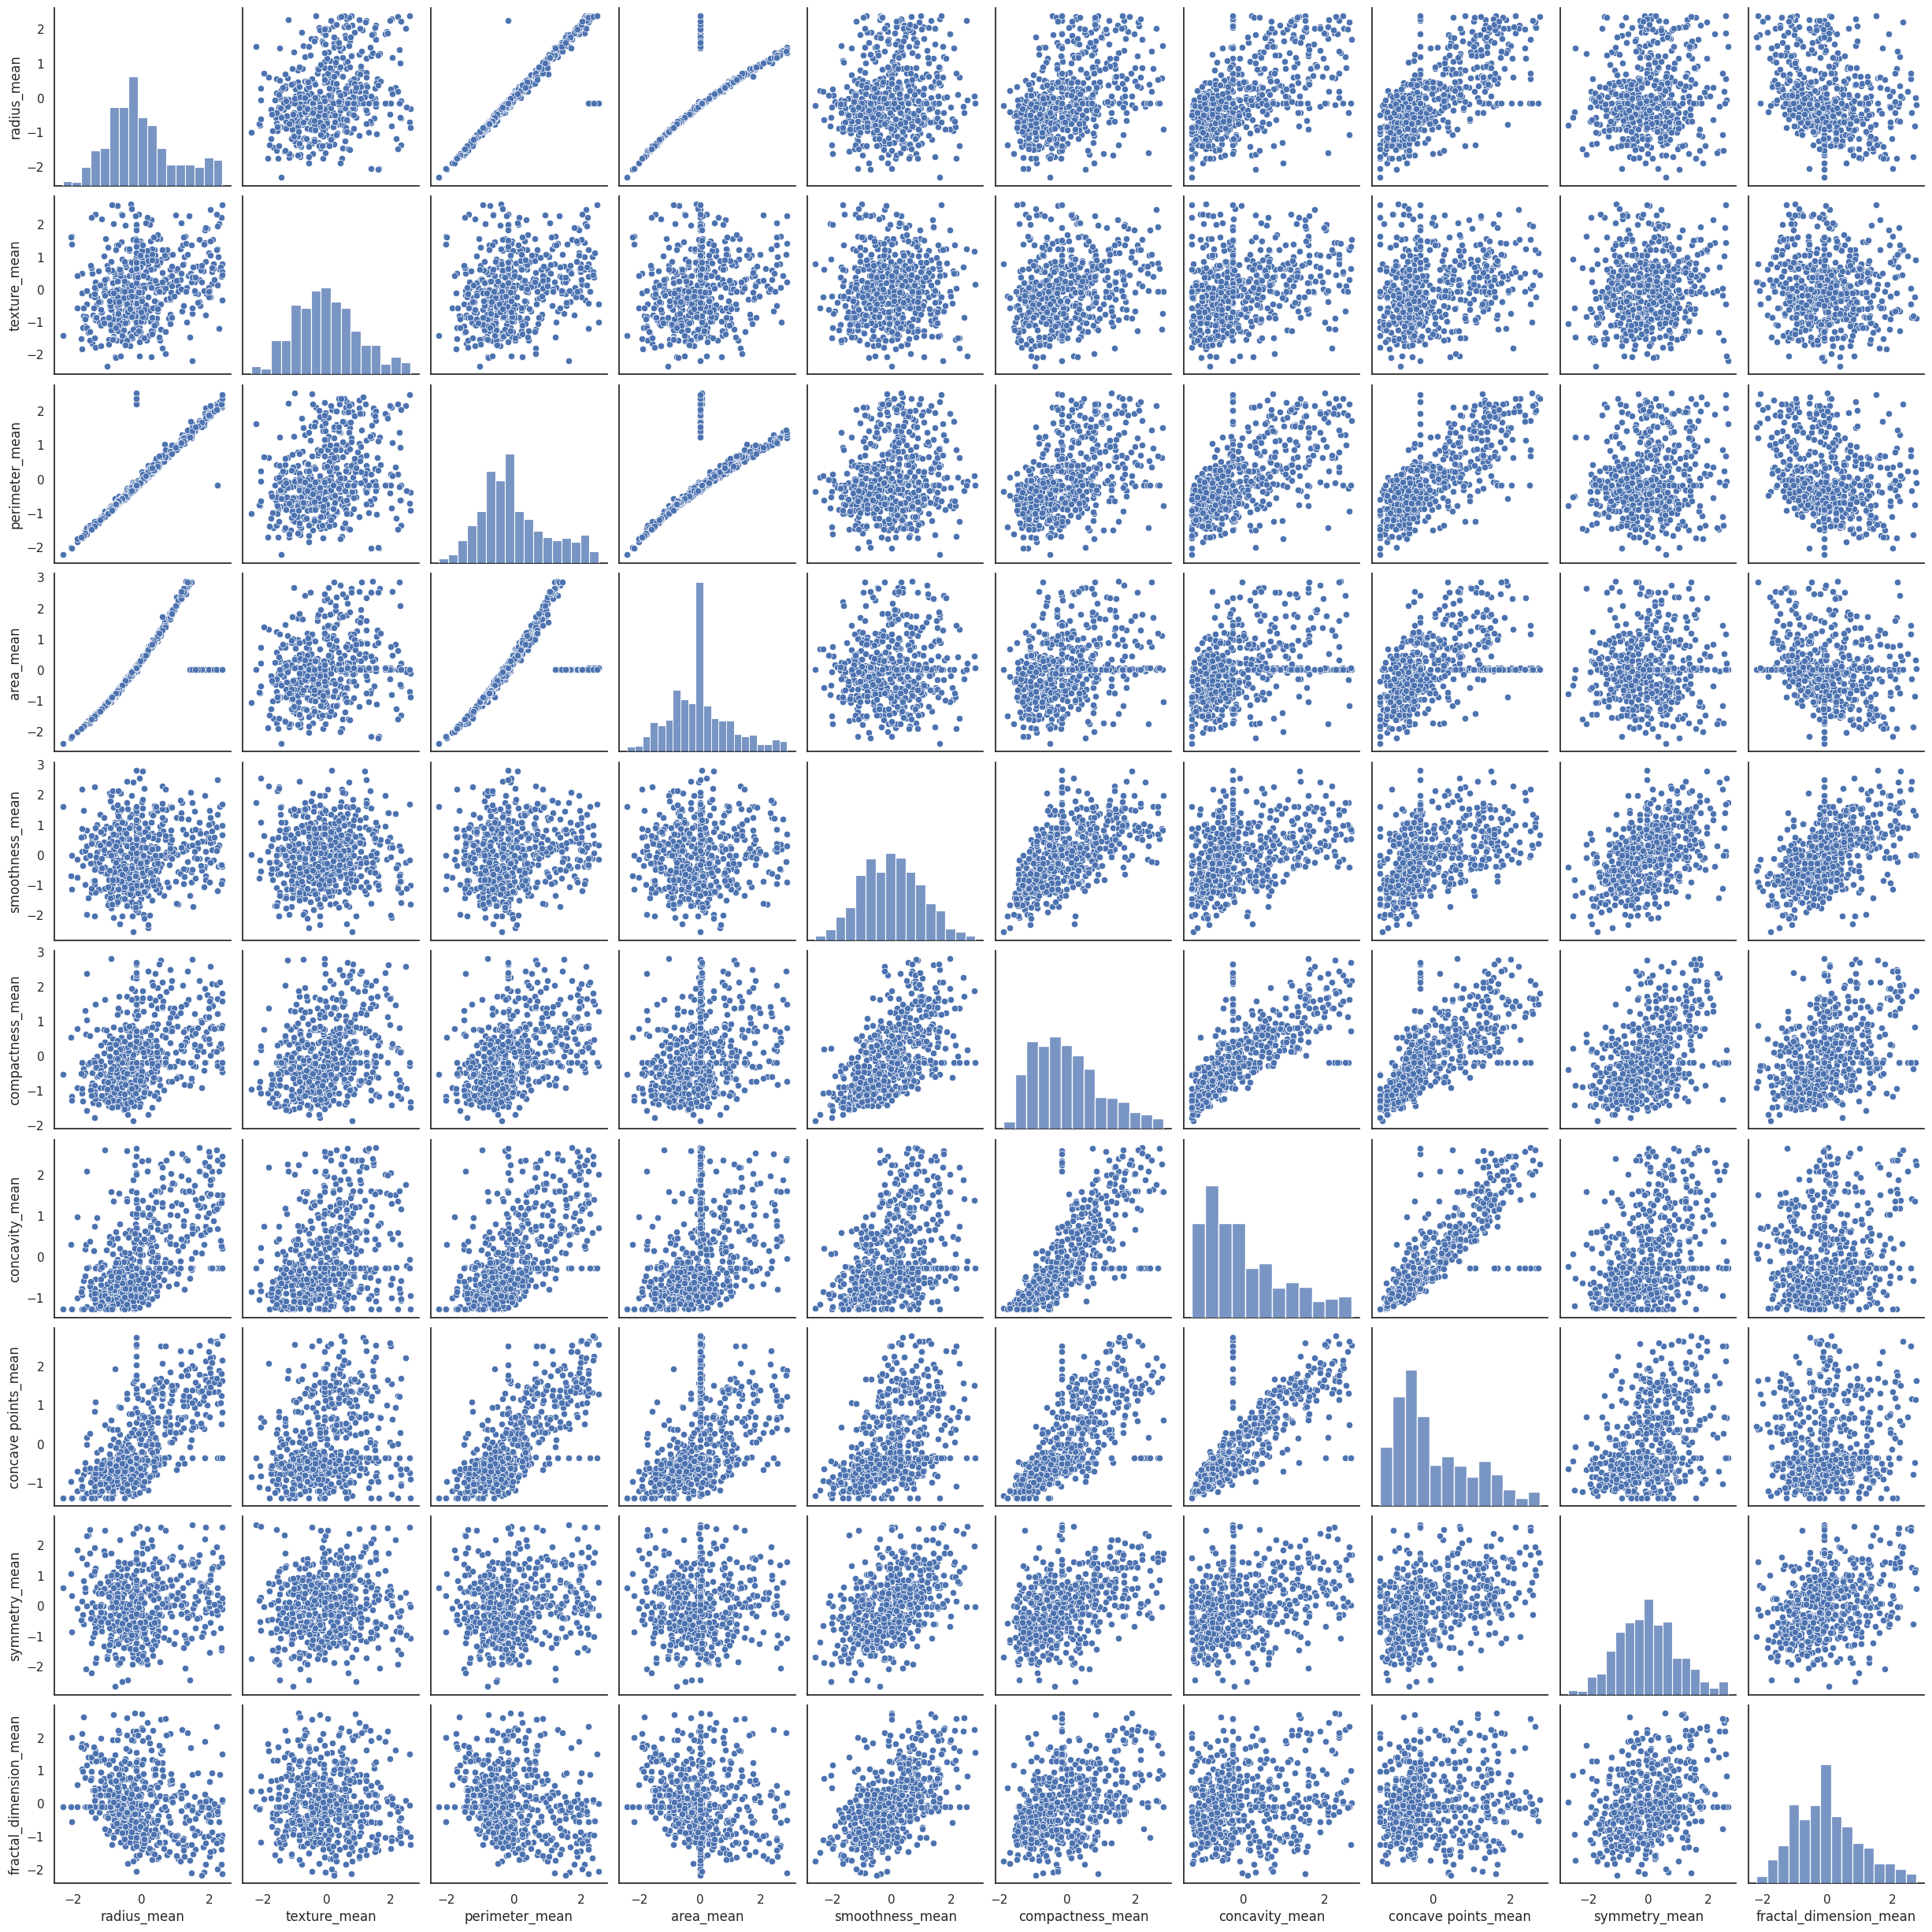

In [ ]:
#visualise the data
sns.pairplot(data.iloc[:,1:])

<Axes: >

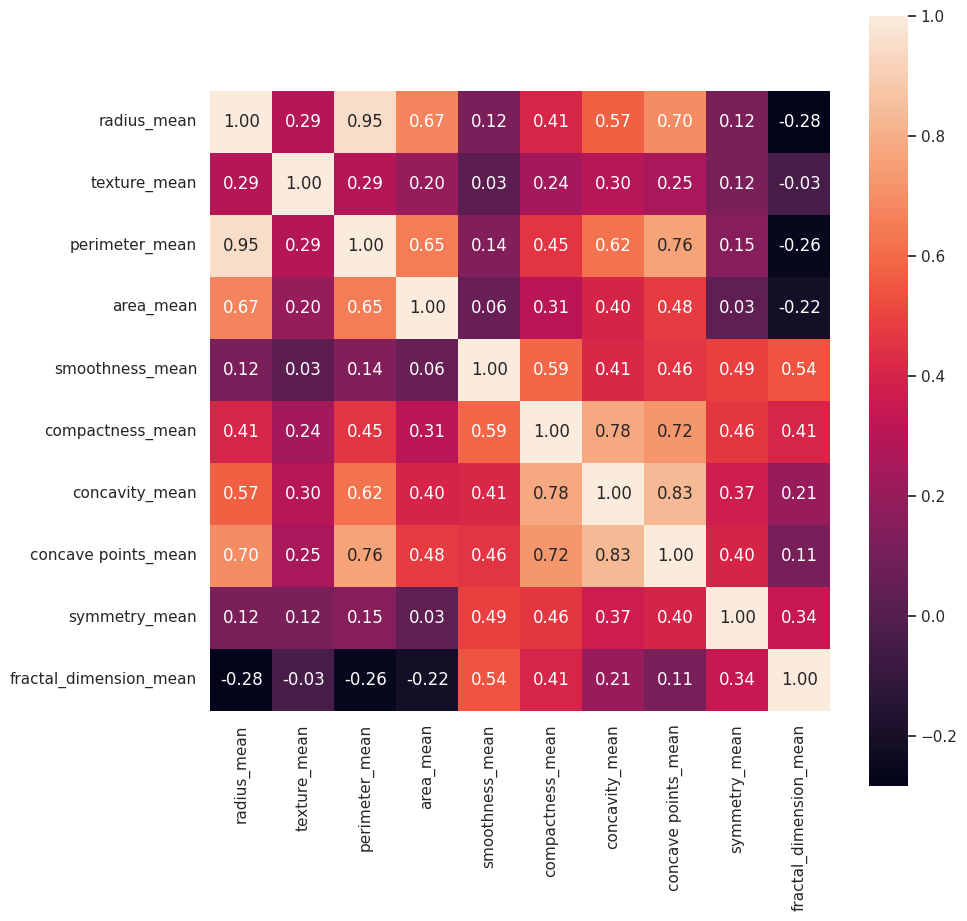

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,1:].corr(),annot=True, fmt='.2f', square = True)

#Interpretation
The correlation matrix revealed several strong relationships between tumor characteristics, with key features like radius_mean, perimeter_mean, and area_mean showing high positive correlations. For instance, radius_mean and perimeter_mean were highly correlated (0.952), indicating that as the radius of a tumor increased, its perimeter also increased, reflecting the size of the tumor.

Features related to tumor shape, such as concave points_mean, concavity_mean, and compactness_mean, displayed strong correlations. For example, concave points_mean correlated highly with both concavity_mean (0.830) and compactness_mean (0.723), indicating that tumors with more concave points tended to be more compact and concave, capturing similar aspects of tumor morphology.

In contrast, texture_mean showed weak or negligible correlations with most other features, indicating it captured a different aspect of the tumor, relatively independent of size and shape. This uniqueness could make texture_mean a valuable feature in a predictive model.

Some weak negative correlations were observed, such as between radius_mean and fractal_dimension_mean (-0.283), indicating that larger tumors had less complex boundaries. As tumors grew, their shape became less intricate. These correlations identified both potential redundancy among size-related features and distinct aspects of tumor morphology relevant for analysis.



In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,1.483967,-2.201938,1.627074,0.013746,1.725634,-0.175292,-0.274712,-0.354424,2.670869,-0.101638
1,1,2.372621,-0.330420,2.119311,0.013746,-0.859711,-0.448019,0.200974,0.824090,0.091045,-0.950379
2,1,2.069515,0.550890,1.977975,0.013746,1.049727,1.487509,2.079575,2.644197,1.183326,-0.345047
3,1,-0.779002,0.330562,-0.576781,-0.866526,-0.010987,-0.175292,-0.274712,1.928513,-0.032208,-0.101638
4,1,2.276178,-1.199068,2.226531,0.013746,0.335416,0.842015,2.089775,1.900138,0.078295,-0.556549


In [ ]:
# Preparing the data
X = data.drop(columns=['diagnosis'])  # Preparing the feature matrix by excluding the target variable
y = data['diagnosis'] #.map({'B': 0, 'M': 1})  # Converting the target variable to numerical values

# Futher splitying into data into training, validation and test data in (y) and (X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify= y, random_state = 42)
#X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.20, stratify= y_train, random_state = 0)

#***Initializing the Models***

In the code provided, we are setting up and configuring several machine learning models to classify our data. Here’s a detailed explanation of what we’re doing for each model:

### **Logistic Regression**:
We initialize a `LogisticRegression` model with a random seed for reproducibility and set the maximum number of iterations to 500. We then define a parameter grid where we only specify one value for `C`, which controls the regularization strength, and choose the `saga` solver. This solver is particularly suited for large datasets and works well with elastic net regularization.

### **Random Forest**:
Next, we configure a `RandomForestClassifier` and define a parameter distribution for a randomized search. We set the number of trees (`n_estimators`) to 200 and the maximum depth of each tree (`max_depth`) to 20. We also use uniform distributions to set the minimum number of samples required to split an internal node (`min_samples_split`) and to be at a leaf node (`min_samples_leaf`). These parameters help control the complexity of the trees in the forest and prevent overfitting.

### **K-Nearest Neighbors (KNN)**:
For the `KNeighborsClassifier`, we define a parameter grid to search for the best `n_neighbors` value, set to 3 in this case. We also specify the algorithm to be `'auto'`, allowing the model to choose the best method based on the input data, and use `p=2` to apply the Euclidean distance metric for calculating distances between neighbors.

### **Naive Bayes**:
We initialize a `GaussianNB` classifier without specifying any additional parameters, as this model typically does not require extensive hyperparameter tuning.

### **Decision Tree**:
A `DecisionTreeClassifier` is set up with a random seed for consistency, but no specific parameters are provided. Decision trees are usually configured with parameters related to tree depth and minimum samples per leaf, which could be adjusted later based on performance.

### **Support Vector Machine (SVM)**:
The `SVC` model is initialized with a random seed and a maximum number of iterations set to 500. SVMs are versatile classifiers that can be fine-tuned with parameters such as the kernel type and regularization strength, which are not specified here but might be considered for further optimization.

### **Gradient Boosting Classifier (SGC)**:
We prepare a `GradientBoostingClassifier`, a model that builds an ensemble of decision trees in a sequential manner, where each tree corrects errors made by the previous ones. Like the other models, it is initialized with a random seed for reproducibility.

### **Artificial Neural Network (ANN)**:
We construct an `ANN` using Keras. The network architecture consists of:
- **Input Layer**: Accepts the number of features in the training set.
- **Hidden Layers**: Three dense layers with ReLU activation functions and dropout layers to prevent overfitting. Each dense layer has a regularization term applied (`l2` regularization).
- **Output Layer**: A single neuron with a sigmoid activation function to provide a probability output for binary classification.

We compile the ANN with the Adam optimizer and binary crossentropy loss function, focusing on maximizing accuracy.

In [ ]:
# Initialize models
logistic_reg = LogisticRegression(random_state=42, max_iter=500)
# Define the parameter grid
param_grid = {
    'C': [ 0.1],  # Regularization strength
    'solver': ['saga']  # Solver options
}
random_forest = RandomForestClassifier(random_state=42)
'''
param_distributions = {
    'n_estimators': [200],  # Number of trees
    'max_depth': [20],  # Maximum depth of trees
    'min_samples_split': uniform(0.14253772248504742),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': uniform(0.1501783280345178)   # Minimum number of samples required to be at a leaf node
}
'''
knn = KNeighborsClassifier(n_neighbors=5)
# Define the parameter grid
param_grid = {
    'n_neighbors': [3],
    'algorithm':['auto'],
    'p':[2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear',random_state=0, max_iter=500)
sgb = GradientBoostingClassifier(random_state=42)

# Artificial Neural Network model
ann = Sequential()
ann.add(Input(shape=(X_train.shape[1],)))
ann.add(Dense(units=29, activation='relu', kernel_regularizer=l2(0.05)))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.05)))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.05)))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting model 1
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Fitting model 2
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Fitting model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Fitting model 4
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Fitting model 5
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Fitting model 6
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=500, random_state=0)

In [ ]:
# Fitting model 7
sgb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Fitting Model 8
ann.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

#***Testing and Evaluating the Models***

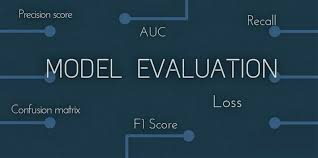

### **1. Dictionary of Models**:
We initialized a dictionary called `models` containing various classification models. Each entry in the dictionary had a model name as the key and the corresponding model object as the value. This setup allowed us to systematically evaluate and compare multiple models using the same dataset.

### **2. Plot Setup**:
We created a plot for ROC curves with a size of 10 by 8 inches. This plot was crucial for visually comparing the performance of each model. The ROC curve helped us assess how well each model distinguished between the positive and negative classes.

### **3. Model Predictions and Evaluations**:
For each model, we followed specific procedures to obtain predictions and evaluate their performance:

- **Artificial Neural Network (ANN)**:
  - We predicted probabilities using the ANN and then converted these probabilities into binary class labels. This conversion was necessary because the ANN outputted probabilities rather than direct class predictions. This allowed us to compute the ROC curve and AUC based on probability scores.

- **Other Models with `predict_proba`**:
  - Models such as Logistic Regression and Random Forest that included the `predict_proba` method provided the probability estimates for the positive class. These probabilities were used to generate ROC curves and calculate the AUC. The AUC metric indicated the overall ability of the model to discriminate between positive and negative cases.

- **Models with `decision_function`**:
  - For models like Support Vector Machine (SVM) that utilized `decision_function`, we obtained decision scores instead of probabilities. These scores were used to compute the ROC curve and AUC, similar to the probability-based models.

- **Models without `predict_proba` or `decision_function`**:
  - For models that did not provide probability scores or decision functions, we relied on the predicted class labels alone. This approach limited the evaluation to accuracy without assessing ROC curves, but it still provided basic performance insights.

### **4. Calculate ROC Curve and AUC**:
We calculated the ROC curve and AUC for each model. The ROC curve illustrated the trade-off between the true positive rate and the false positive rate. The AUC quantified the model's ability to discriminate between the classes, with a higher AUC indicating better performance.

### **5. Plot ROC Curve**:
We plotted the ROC curves for all models, including the AUC score in the legend for each curve. This visual representation allowed us to directly compare the models' performance in distinguishing between positive and negative classes. The ROC plot was instrumental in identifying models with better discriminatory power.

### **6. Print Metrics**:
For each model, we printed several key performance metrics:
- **Accuracy**: This metric showed the proportion of correctly classified instances and provided a straightforward measure of overall performance.
- **Classification Report**: The report included precision, recall, and F1-score, offering a detailed view of each model's performance in handling both classes.
- **Confusion Matrix**: This matrix displayed the counts of true positives, true negatives, false positives, and false negatives, helping us understand where each model made classification errors.

### **7. Final Plot Settings**:
We added a diagonal dashed line to the ROC plot, representing the performance of a random classifier (i.e., no discriminatory power). The x-axis was labeled as the false positive rate, and the y-axis was labeled as the true positive rate. We included a legend and enabled the grid to enhance readability and interpretation of the plot.

### **8. Show Plot**:
Finally, we displayed the ROC plot to visually compare the performance of all models. This visualization facilitated the selection of the best-performing model based on the ROC curves and AUC scores.


Logistic Regression Accuracy: 0.94
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Logistic Regression Confusion Matrix:
[[67  5]
 [ 2 40]]

Random Forest Accuracy: 0.92
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114


Random Forest Confusion Matrix:
[[68  4]
 [ 5 37]]

K Nearest Neighbors Accuracy: 0.92
K Nearest Neighbors Classification Report:
            

<Figure size 1000x800 with 0 Axes>

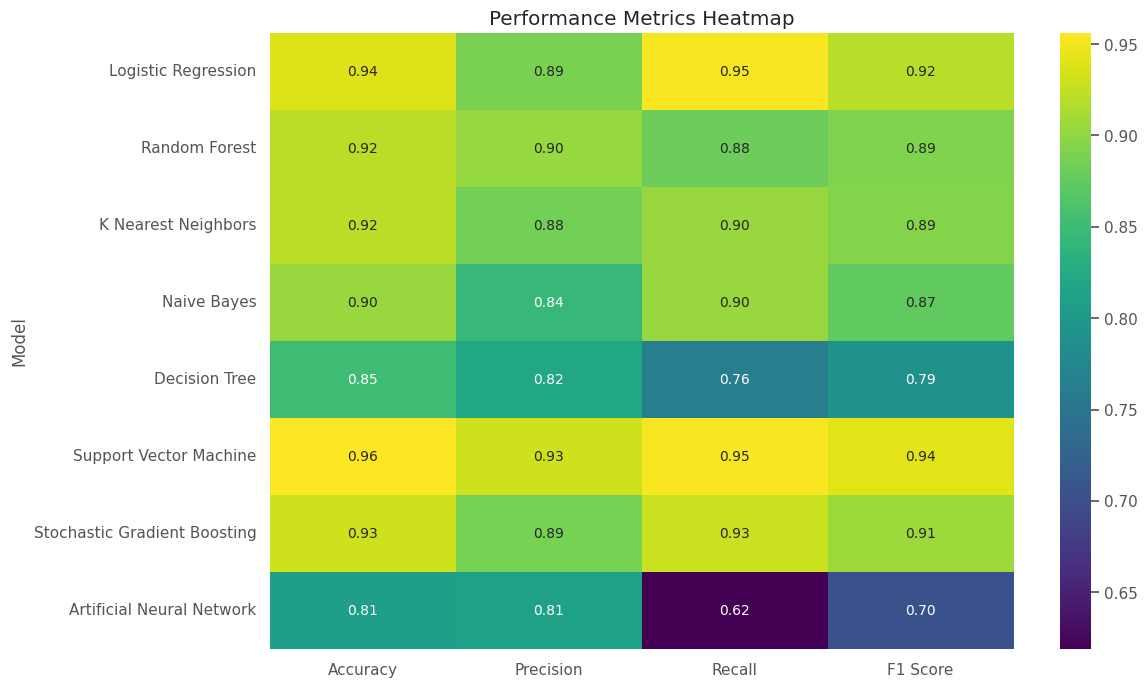

In [ ]:
# Dictionary of models
models = {
    "Logistic Regression": logistic_reg,
    "Random Forest": random_forest,
    "K Nearest Neighbors": knn,
    "Naive Bayes": naive_bayes,
    "Decision Tree": decision_tree,
    "Support Vector Machine": svm,
    "Stochastic Gradient Boosting": sgb,
    "Artificial Neural Network": ann
}

# Initialize a plot for ROC curves
plt.figure(figsize=(10, 8))

# Predictions and evaluations
for name, model in models.items():
    if name == "Artificial Neural Network":
        # For ANN, predict probabilities and convert to class labels
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary labels
    elif hasattr(model, "predict_proba"):
        # For models that have predict_proba (like Logistic Regression, Random Forest, etc.)
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probability of the positive class
        y_pred = model.predict(X_test)
    elif hasattr(model, "decision_function"):
        # For models like SVM that use decision_function
        y_pred_prob = model.decision_function(X_test)
        y_pred = model.predict(X_test)
    else:
        # For models that don't provide probability, just use the predictions
        y_pred_prob = y_pred = model.predict(X_test)

    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC Curve
    #plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    # Print accuracy and classification report
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
'''
# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
'''
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Set 'Model' as index for heatmap
metrics_df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Performance Metrics Heatmap')
plt.show()

#**Interpreation of Accuracy, Precision, Recall, and F1-Score Analysis**

### Logistic Regression
The Logistic Regression model achieved an accuracy of 0.94, indicating a strong overall performance. The classification report showed high precision (0.97) and recall (0.93) for class 0, and good performance for class 1 with a precision of 0.89 and recall of 0.95. The confusion matrix revealed that the model correctly classified 67 instances of class 0 and 40 instances of class 1, with only a few misclassifications. The results suggested that Logistic Regression was effective in distinguishing between the two classes with a balanced approach.

### Random Forest
The Random Forest model had an accuracy of 0.92. The precision and recall were slightly lower than Logistic Regression, with values of 0.93 and 0.94 for class 0, and 0.90 and 0.88 for class 1, respectively. The confusion matrix showed that the model correctly identified 68 instances of class 0 and 37 instances of class 1, but made a few more misclassifications compared to Logistic Regression. This model was still robust but showed slightly reduced performance in comparison.

### K Nearest Neighbors (KNN)
The KNN model also recorded an accuracy of 0.92. Its precision and recall were comparable to those of Random Forest, with precision of 0.94 and recall of 0.93 for class 0, and precision of 0.88 and recall of 0.90 for class 1. The confusion matrix indicated that KNN correctly classified 67 instances of class 0 and 38 instances of class 1. Like Random Forest, KNN showed reliable performance, though with a few more misclassifications in the positive class.

### Naive Bayes
The Naive Bayes model achieved an accuracy of 0.90. The precision and recall for class 0 were 0.94 and 0.90, respectively, while for class 1, they were 0.84 and 0.90. The confusion matrix showed correct classification of 65 instances of class 0 and 38 instances of class 1, but it made more mistakes than the other models, especially for class 1. This model demonstrated reasonable performance but was less effective compared to the top models.

### Decision Tree
The Decision Tree model had an accuracy of 0.85. Its performance metrics showed precision of 0.87 and recall of 0.90 for class 0, and precision of 0.82 and recall of 0.76 for class 1. The confusion matrix revealed correct classifications of 65 instances of class 0 and 32 instances of class 1, with a noticeable number of misclassifications. This model performed adequately but had lower accuracy and less balanced results compared to the others.

### Support Vector Machine (SVM)
The Support Vector Machine model achieved the highest accuracy of 0.96. It had excellent precision and recall values, with precision of 0.97 and recall of 0.96 for class 0, and precision of 0.93 and recall of 0.95 for class 1. The confusion matrix indicated that SVM correctly classified 69 instances of class 0 and 40 instances of class 1, with minimal misclassifications. This model was the most effective in distinguishing between classes.

### Stochastic Gradient Boosting (SGB)
The Stochastic Gradient Boosting model recorded an accuracy of 0.93. It showed strong performance with precision of 0.96 and recall of 0.93 for class 0, and precision of 0.89 and recall of 0.93 for class 1. The confusion matrix indicated correct classifications of 67 instances of class 0 and 39 instances of class 1, with only a few misclassifications. This model was highly effective but slightly less accurate than SVM.

### Artificial Neural Network (ANN)
The Artificial Neural Network model had the lowest accuracy of 0.81. It demonstrated lower performance with precision of 0.80 and recall of 0.92 for class 0, and precision of 0.81 and recall of 0.62 for class 1. The confusion matrix showed correct classification of 66 instances of class 0 and 26 instances of class 1, with a higher number of misclassifications, particularly for class 1. This model struggled more compared to the other models, reflecting challenges in handling the dataset effectively.

#**Model Selection**
Based on the performance metrics provided, the Support Vector Machine (SVM) stands out as the most effective model for this classification task.

**Accuracy**: The SVM model achieved the highest accuracy of 0.96, outperforming all other models. This indicates that it had the best overall performance in correctly classifying instances from the test set.

**Precision and Recall**: SVM demonstrated excellent precision and recall for both classes:
For class 0 (Benign): Precision of 0.97 and recall of 0.96.

For class 1 (Malignant): Precision of 0.93 and recall of 0.95. These metrics suggest that the SVM model was particularly effective at identifying both classes with minimal misclassifications.

**Confusion Matrix:** The confusion matrix showed that SVM correctly classified 69 instances of class 0 and 40 instances of class 1, with only a few misclassifications. This indicates that the model’s predictions were highly reliable.

**Overall Performance:** Compared to other models, SVM not only achieved the highest accuracy but also had balanced performance across both classes, demonstrating robustness and reliability in its predictions.

smoothness_mean           1.178318
texture_mean              1.110515
concave points_mean       0.960713
perimeter_mean            0.794494
concavity_mean            0.753504
radius_mean               0.642032
symmetry_mean             0.198090
area_mean                 0.100667
compactness_mean         -0.178028
fractal_dimension_mean   -0.524105
dtype: float64


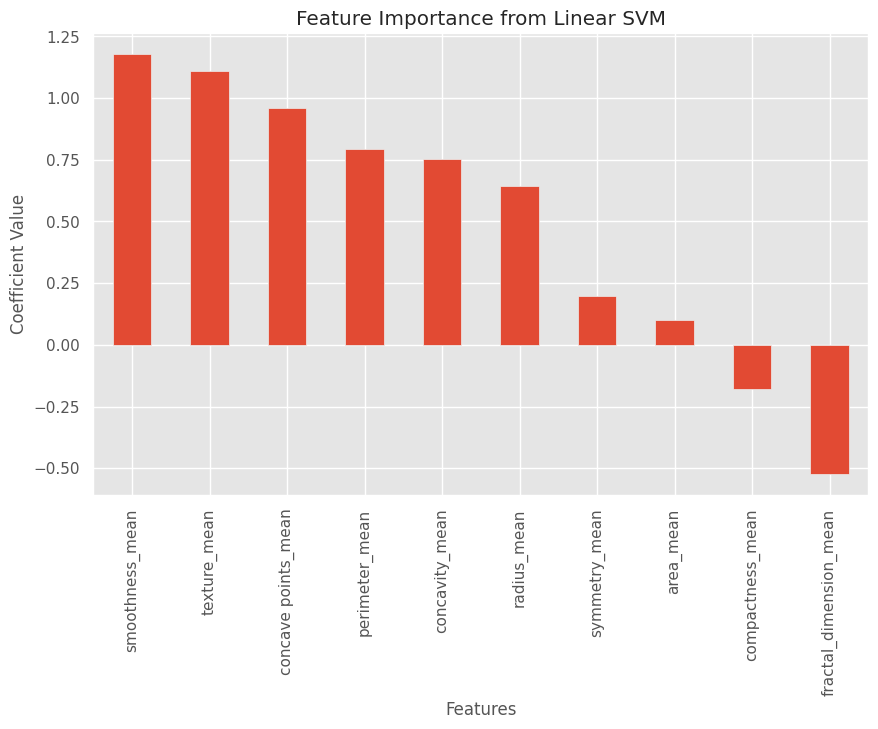

In [ ]:
# Get the coefficients
coefficients = svm.coef_.flatten()
feature_importance = pd.Series(coefficients, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Linear SVM')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


                  Feature  Coefficient
1            texture_mean     1.483381
4         smoothness_mean     1.322869
7     concave points_mean     1.200271
2          perimeter_mean     1.094764
0             radius_mean     1.042386
6          concavity_mean     1.032172
8           symmetry_mean     0.307593
3               area_mean     0.229534
5        compactness_mean    -0.107812
9  fractal_dimension_mean    -0.586776


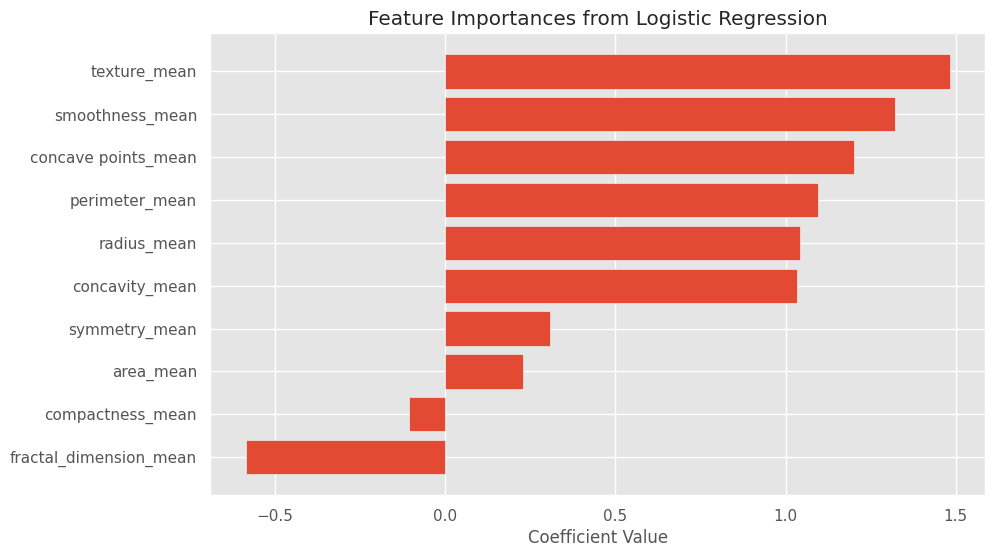

In [ ]:
# Assuming X_train is a DataFrame with feature names
feature_names = X_train.columns

# Get the coefficients from the fitted model
coefficients = logistic_reg.coef_[0]  # For binary classification

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Print the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importances from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Define the limits of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')


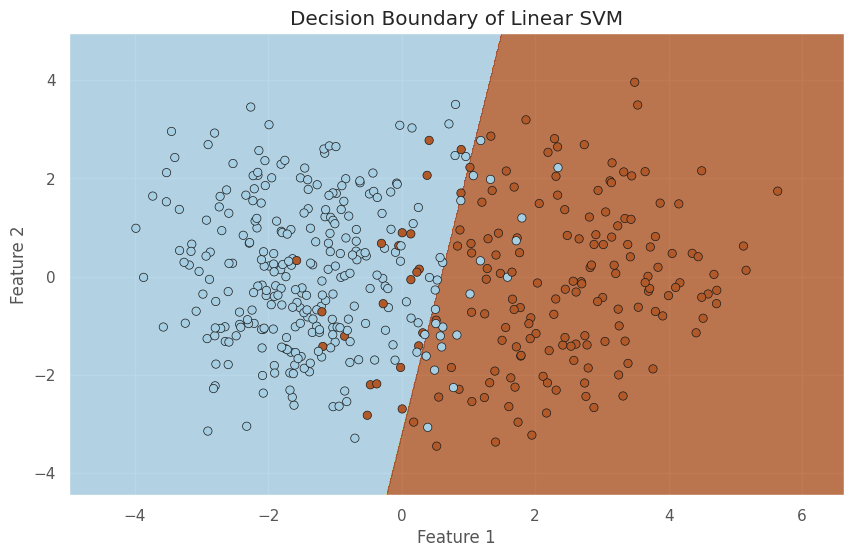

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization if necessary
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Fit the Linear SVM on the reduced dimensions
svm.fit(X_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
# Assuming you have a function to plot decision boundaries
plot_decision_boundary(svm, X_pca, y_train)
plt.title('Decision Boundary of Linear SVM')
plt.show()

#**Handling Multicollinear Features**
When features are collinear, permuting one feature has little effect on the models performance because it can get the same information from a correlated feature. Note that this is not the case for all predictive models and depends on their underlying implementation.

One way to handle multicollinear features is by performing hierarchical clustering on the Spearman rank-order correlations, picking a threshold, and keeping a single feature from each cluster. First, we plot a heatmap of the correlated features

In [ ]:
'''
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()

Next, we manually picked a threshold by visual inspection of the dendrogram to group our features into clusters and choose a feature from each cluster to keep, select those features from our dataset, and train a new random forest. The test accuracy of the new random forest did not change much compared to the random forest trained on the complete dataset.

In [ ]:
'''
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X.columns[selected_features]

X_train_sel = X_train[selected_features_names]
X_test_sel = X_test[selected_features_names]

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Baseline accuracy on test data with features removed:"
    f" {clf_sel.score(X_test_sel, y_test):.2}"
)

We finally explored the permutation importance of the selected subset of features

In [ ]:
'''
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf_sel, X_test_sel, y_test, ax)
ax.set_title("Permutation Importances on selected subset of features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.show()

                  Feature  Coefficient
1            texture_mean     1.483381
4         smoothness_mean     1.322869
7     concave points_mean     1.200271
2          perimeter_mean     1.094764
0             radius_mean     1.042386
6          concavity_mean     1.032172
8           symmetry_mean     0.307593
3               area_mean     0.229534
5        compactness_mean    -0.107812
9  fractal_dimension_mean    -0.586776


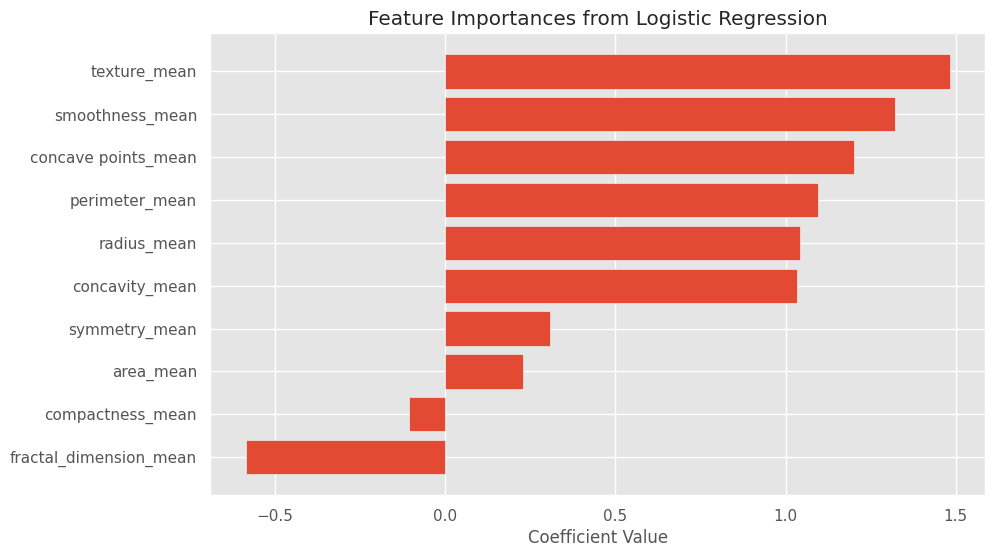

In [ ]:
# Assuming X_train is a DataFrame with feature names
feature_names = X_train.columns

# Get the coefficients from the fitted model
coefficients = logistic_reg.coef_[0]  # For binary classification

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Print the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importances from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()

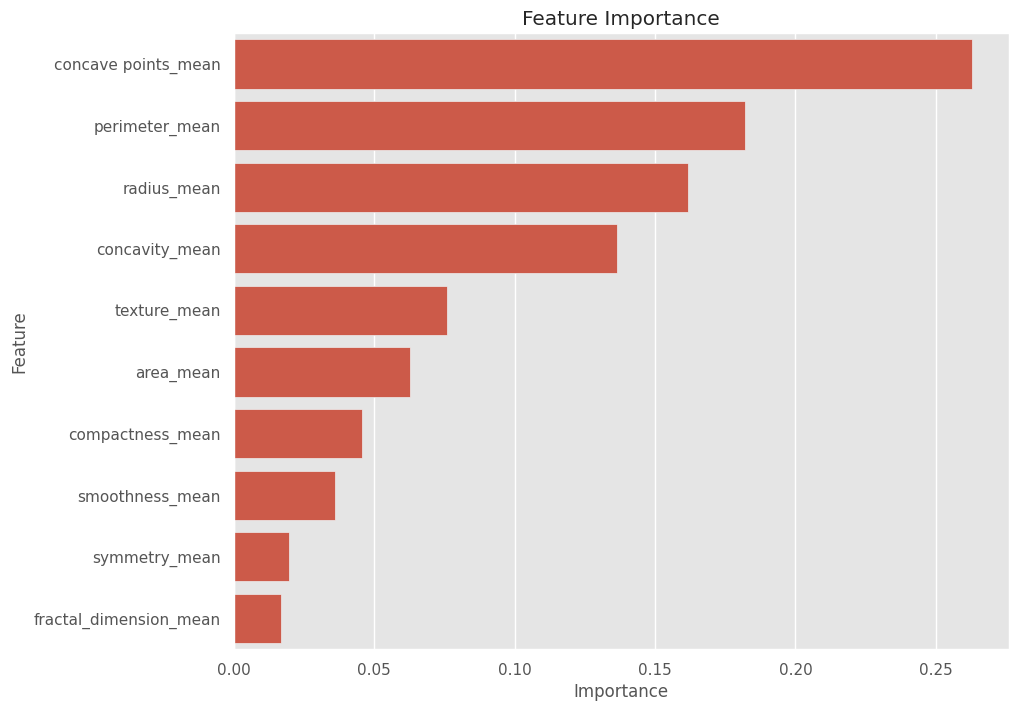

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 8))  # Setting the figure size to 10x8 inches for better visualization

# Creating a bar plot to display feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances)  # Plotting the importance of each feature

# Adding titles and labels to the plot
plt.title('Feature Importance')  # Setting the title of the plot
plt.xlabel('Importance')  # Labeling the x-axis as 'Importance'
plt.ylabel('Feature')  # Labeling the y-axis as 'Feature'

plt.show()  # Displaying the plot